## Energy Efficiency Data Set
### Homework 2
#### Drazen Zack

### Loading libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy as sp
from scipy.stats import skew, boxcox, zscore
import statsmodels.api as sm
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA 
import pylab
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.stattools import durbin_watson
from statsmodels import stats
import math
import pylab 

### Exploratory Data Analysis

Droping columns that are not needed

In [2]:
df = pd.read_csv('ENB2012_data.csv')
df.drop('Unnamed: 10', inplace = True, axis = 1)
df.drop('Unnamed: 11', inplace = True, axis = 1)
df.drop('Y1', inplace = True, axis = 1)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y2
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,21.33
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,21.33
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,21.33
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,21.33
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,28.28


### Changed name of Y2 to cooling load

Of the two y variables I decided to pick y2 as my y variable. 

In [3]:
df.rename({'Y2':'cooling_load'}, inplace = True, axis = 1)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,21.33
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,21.33
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,21.33
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,21.33
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,28.28


### Finding Na values by column 

When loading the data into python there seemed to be a problem of rows that had no values in any column at the end of the dataset. To remove them I just used the function dropna.  

In [4]:
df.isnull().sum()

X1              528
X2              528
X3              528
X4              528
X5              528
X6              528
X7              528
X8              528
cooling_load    528
dtype: int64

In [5]:
df1 = df.dropna()
print(df.shape)
print(df1.shape)
df1.isnull().sum()

(1296, 9)
(768, 9)


X1              0
X2              0
X3              0
X4              0
X5              0
X6              0
X7              0
X8              0
cooling_load    0
dtype: int64

### Summary Statistics

Summary statistics where created to gain an understanding of the dataset. When looking at the mean for each column, the magnitude of X2, X3, and X4 is much bigger than the other columns. Scaling will be needed.  A view of the skewness in the dataset was added to get an understanding of the distribution. X1 and X3 are the most positively skewed and X2 and X4 are slightly negatively skewed. Cooling load is also positively skewed. The rest are skewed a little or are not skewed at all. 

In [6]:
df1.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,cooling_load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,48.030000


In [7]:
df1.skew()

X1              0.495513
X2             -0.125131
X3              0.533417
X4             -0.162764
X5              0.000000
X6              0.000000
X7             -0.060254
X8             -0.088689
cooling_load    0.395992
dtype: float64

### Histograms 

A histogram was created for each of the columns in the dataset. There isn’t any normal distributed data in the dataset.  X5 and X6 have a uniform distribution which is why there skew is zero. The cooling load histogram shows a slight positive skew. X4 and X2 are negatively skewed which backs up the skew data from above. Same with X1 and X3 which had a skew that was positive and the histogram shows the same results. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f1eab38>,
      dtype=object)

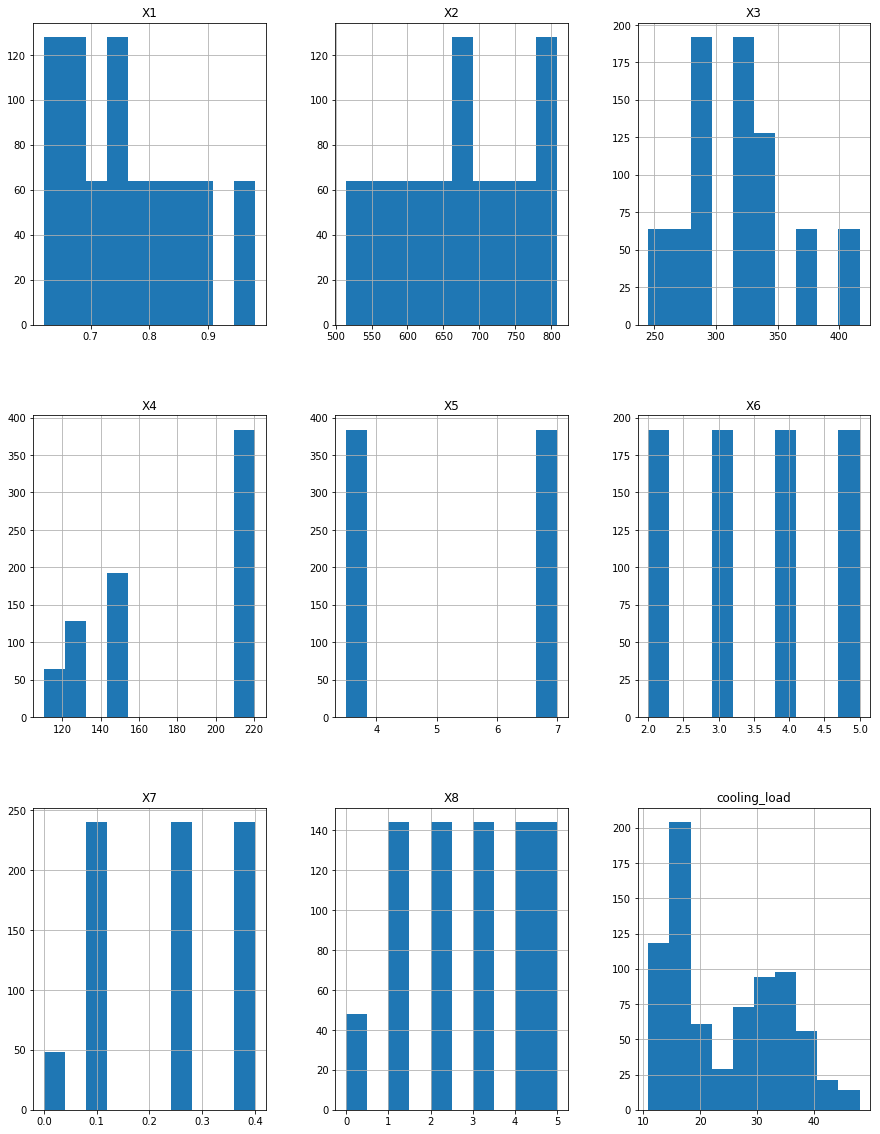

In [8]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df1.hist(ax = ax,bins = 10)

A Q-Q plot was added to check if cooling load the dependent variable had a normal distribution. Based on the results of the histogram and the Q-Q plot the data in cooling load doesn’t have a normal distribution.

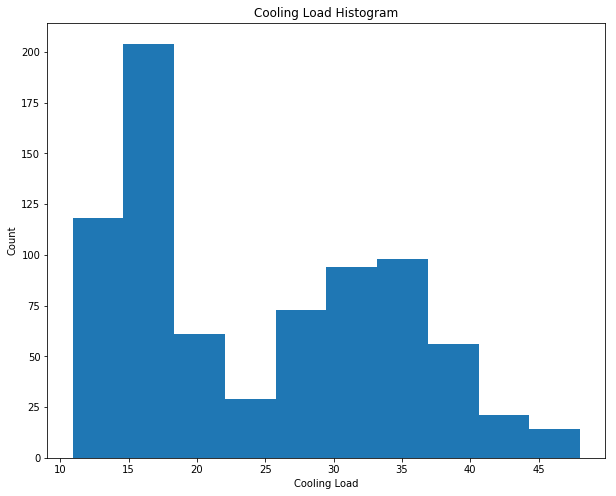

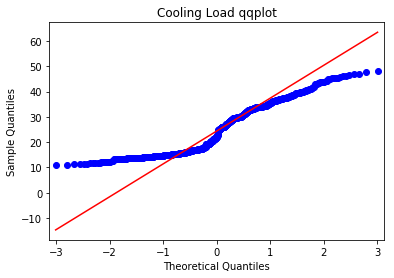

In [9]:
plt.figure(figsize=(10,8))
plt.hist(x=df1['cooling_load'], bins = 10)
plt.title('Cooling Load Histogram')
plt.xlabel('Cooling Load')
plt.ylabel('Count')


sm.qqplot(df1['cooling_load'], line = 'q')
plt.title('Cooling Load qqplot')
pylab.show()


### Correlation

Correlation of all the variables was taken because all variables are numeric in this dataset. From viewing the correlation plot created there is highly correlated variables that are not correlated with the dependent variable cooling load. A table was created to see all correlated variables that have a correlation greater than 0.8. Some type of transformation is going to be needed on these highly correlated variables. 

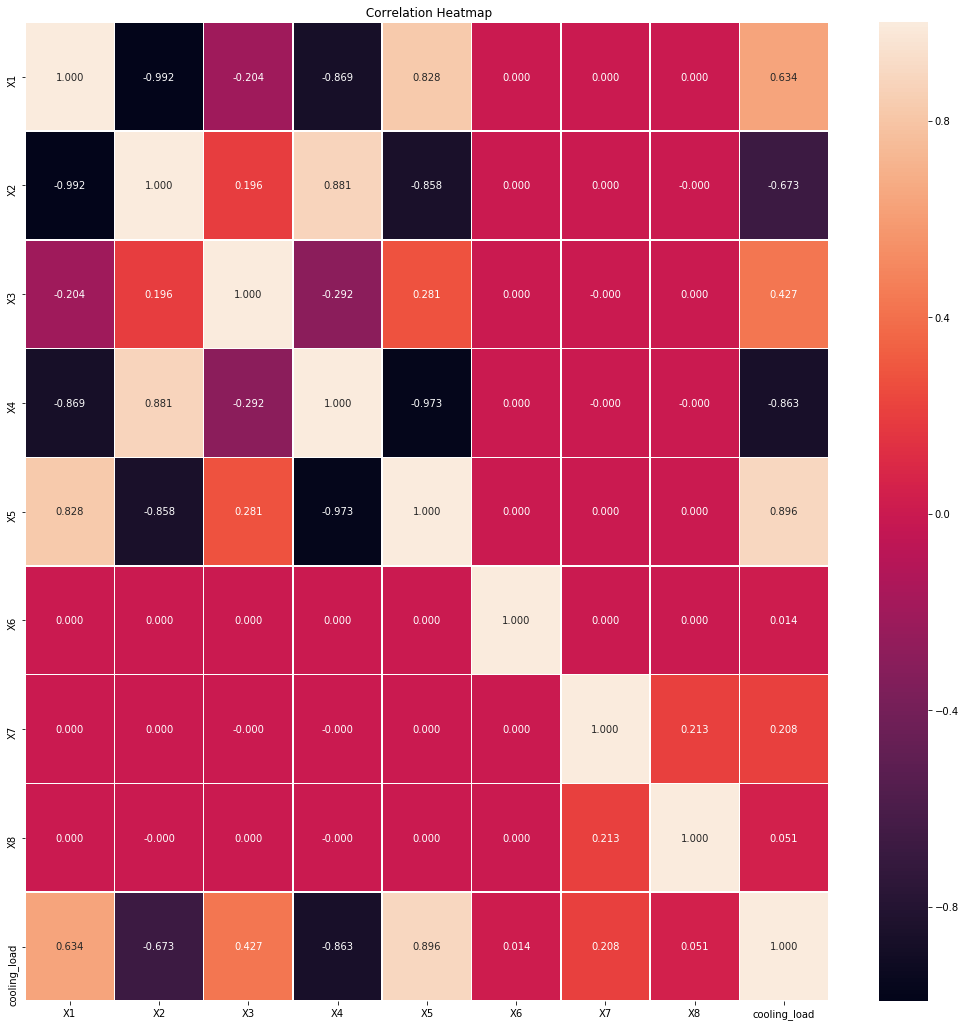

In [10]:
### Correlation plot
cor = df1.corr()
f,ax = plt.subplots(figsize = (18,18))
plt.title(' Correlation Heatmap')
sns.heatmap(cor, annot = True, linewidths = .5, fmt='.3f', ax = ax)

In [11]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]
print('Correlation Greater Than 0.8')
get_top_abs_correlations(df1,8)

Correlation Greater Than 0.8


X1  X2              0.991901
X4  X5              0.972512
X5  cooling_load    0.895785
X2  X4              0.880720
X1  X4              0.868823
X4  cooling_load    0.862547
X2  X5              0.858148
X1  X5              0.827747
dtype: float64

### Scatterplot of Correlated variables greater than .8

Scatter plots of the variables that had a correlation greater than 0.8 were created to view the relationships. All of the scatterplots show that all of the relationships match the correlation number from above. An observation from the scatterplots was that a lot of the points are on top of each other. 

Text(0.5,1,'X1 vs. X2')

<Figure size 1440x576 with 0 Axes>

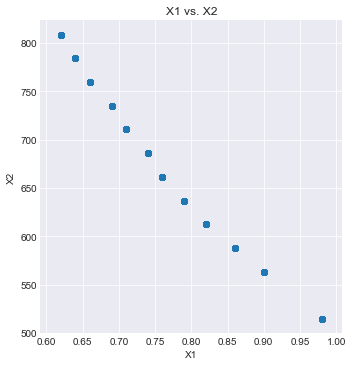

In [12]:
#### Scatterplot
sns.set_style("darkgrid")
plt.figure(figsize=(20,8))
sns.lmplot(x="X1", y="X2", data=df1,fit_reg=False)
plt.title('X1 vs. X2')

Text(0.5,1,'X1 vs. X4')

<Figure size 1440x576 with 0 Axes>

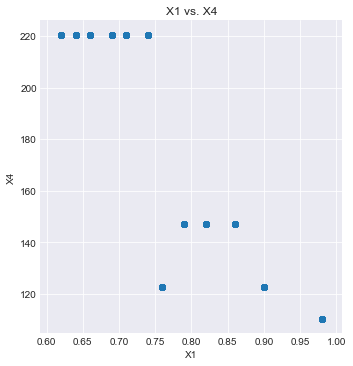

In [13]:
#### Scatterplot
sns.set_style("darkgrid")
plt.figure(figsize=(20,8))
sns.lmplot(x="X1", y="X4", data=df1,fit_reg=False)
plt.title('X1 vs. X4')

Text(0.5,1,'X1 vs. X5')

<Figure size 1440x576 with 0 Axes>

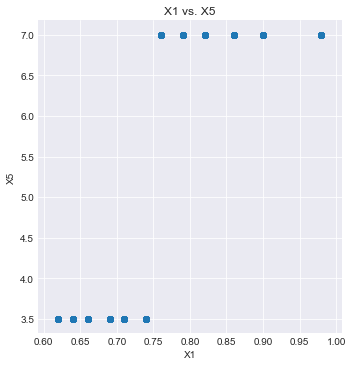

In [14]:
#### Scatterplot
sns.set_style("darkgrid")
plt.figure(figsize=(20,8))
sns.lmplot(x="X1", y="X5", data=df1,fit_reg=False)
plt.title('X1 vs. X5')

Text(0.5,1,'X2 vs. X4')

<Figure size 1440x576 with 0 Axes>

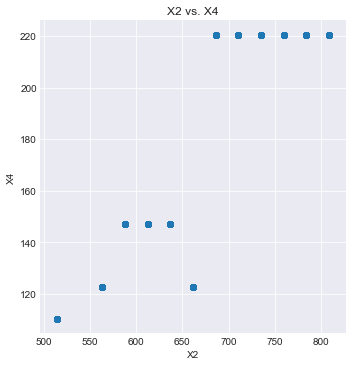

In [15]:
#### Scatterplot
sns.set_style("darkgrid")
plt.figure(figsize=(20,8))
sns.lmplot(x="X2", y="X4", data=df1,fit_reg=False)
plt.title('X2 vs. X4')

Text(0.5,1,'X2 vs. X5')

<Figure size 1440x576 with 0 Axes>

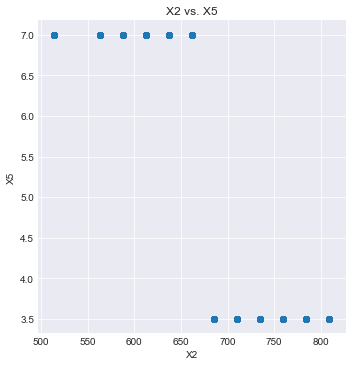

In [16]:
#### Scatterplot
sns.set_style("darkgrid")
plt.figure(figsize=(20,8))
sns.lmplot(x="X2", y="X5", data=df1,fit_reg=False)
plt.title('X2 vs. X5')

Text(0.5,1,'X4 vs. X5')

<Figure size 1440x576 with 0 Axes>

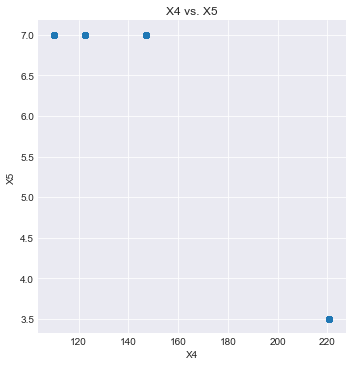

In [17]:
#### Scatterplot
sns.set_style("darkgrid")
plt.figure(figsize=(20,8))
sns.lmplot(x="X4", y="X5", data=df1,fit_reg=False)
plt.title('X4 vs. X5')

## Regressoion Models

### PCA Linear Regression

Since more than two variables had a high correlation between each other PCA was used. The results from predicting with the test and train data show that the model isn’t over fit to the training data. Also, R squared and adjusted R squared are in the .80 to .90 range, which shows that the model explains a majority of the variation in cool loading.  The mean absolute error from the test data of 2.73 isn’t that bad but the goal will be to get the mean absolute error lower. 

In [18]:
#### Spliting, Scaling, and PCA on Data
X = df1.drop('cooling_load', axis =1 ) 
y = df1[['cooling_load']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
sc1 = MinMaxScaler()
X_train = sc1.fit_transform(X_train)
X_test = sc1.transform(X_test)
X_train.shape, X_test.shape

pca = PCA(.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

lin = LinearRegression()
lin.fit(X_train_pca, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Created an Adjusted R Squared Function

In [19]:
def adjusted_r_squared(x,y):
    r_squared= r2_score(x, y)
    adj_2 = 1 - (1-r_squared)*(len(x)-1)/(len(x)-y.shape[1]-1)
    return(adj_2)
    

In [20]:
#### Predictions on Train Set
train_pred = lin.predict(X_train_pca)
R2 = pd.DataFrame([r2_score(y_train, train_pred)], columns=['R squared'])
adj_1 = pd.DataFrame([adjusted_r_squared(y_train, train_pred)], columns=['Adjusted R squared'])
mse1 =  pd.DataFrame([mean_squared_error(y_train, train_pred)], columns=['MSE'])
rmse1 =  pd.DataFrame([np.sqrt(mean_squared_error(y_train, train_pred))], columns=['RMSE'])
mae1 = pd.DataFrame([mean_absolute_error(y_train, train_pred)], columns=['MAE'])
train_PCA = pd.concat([R2, adj_1, mse1, rmse1, mae1], axis = 1)
train_PCA

,R squared,Adjusted R squared,MSE,RMSE,MAE
0,0.866003,0.865784,11.984781,3.461904,2.513822


In [21]:
#### Predictions on Test Set
y_pred = lin.predict(X_test_pca)
R2 = pd.DataFrame([r2_score(y_test, y_pred)], columns=['R squared'])
adj_1 = pd.DataFrame([adjusted_r_squared(y_test, y_pred)], columns=['Adjusted R squared'])
mse1 =  pd.DataFrame([mean_squared_error(y_test, y_pred)], columns=['MSE'])
rmse1 =  pd.DataFrame([np.sqrt(mean_squared_error(y_test, y_pred))], columns=['RMSE'])
mae1 = pd.DataFrame([mean_absolute_error(y_test, y_pred)], columns=['MAE'])
test_PCA = pd.concat([R2, adj_1, mse1, rmse1, mae1], axis = 1)
test_PCA

,R squared,Adjusted R squared,MSE,RMSE,MAE
0,0.85031,0.849325,14.079197,3.752226,2.72934


### Four Assumptions About Residuals

- **Zero Mean Assumption:** The mean of the residuals for this model is -0.14, which is pretty good but the goal is to be closer to zero.  
- **Constant Variance Assumption:** In this model the constant variance assumption is violated because of the funnel shape of the Residual Plot. The goal is to have no noticeable patterns. 
- **Normality Assumption:** In this linear model the residuals are not in a normal distribution which violates the normality assumption. The Q-Q plot is evidence of this violation. The blue points are to be right on the red line if the data is normally distributed. Also, the AD test states that the data is not normally distributed because the statistic value that is given from the residuals is not below the critical values. The lower the statistic the better. 
- **Independence Assumption:** The Durbin Watson test gives a number between 0 and 4. The goal is to be between 1.5 and 2.5. If it is more or less than this range than there is auto-correlation. The value of 2.06 shows no auto-correlation. 

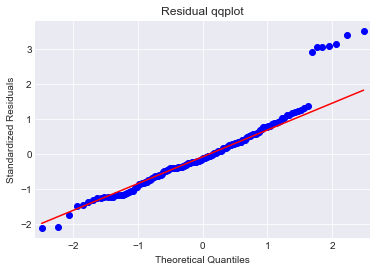

AD Test
statistic:  2.8197576321556426
critical_values:  [0.562 0.64  0.768 0.896 1.065]
significance_level:  [15.  10.   5.   2.5  1. ]
--------------------------------------------------------------------------------
Residual Mean:  -0.14477214124830637
--------------------------------------------------------------------------------
Durbin Watson: [2.0607965]


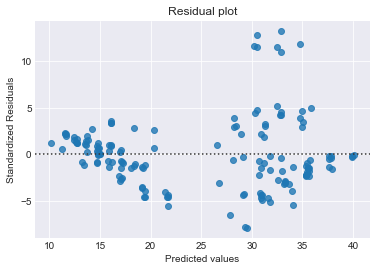

In [22]:
residual_0 = y_test - y_pred
res_0 = np.array(residual_0)
scored_res = residual_0.apply(zscore)
sort_res = scored_res.sort_values(['cooling_load'])

## normality assumption
sm.qqplot(sort_res , line = 'q')
plt.title('Residual qqplot')
plt.ylabel('Standardized Residuals')
pylab.show()
res = np.array(residual_0)
ad = sp.stats.anderson(res_0.ravel(), dist = 'norm')

print('AD Test')
print('statistic: ', ad.statistic)
print('critical_values: ', ad.critical_values)
print('significance_level: ', ad.significance_level)
print('--'*40)
#### Zero-Mean Assumption, Constant Variance Assumption
sns.residplot(y_pred, res_0)
plt.title('Residual plot')
plt.xlabel('Predicted values')
plt.ylabel('Standardized Residuals')
print('Residual Mean: ', res_0.mean())
print('--'*40) 
#### Independence Assumption
print('Durbin Watson:', durbin_watson(residual_0, axis = 0))

### Boxcox transformation on Cooling Load Linear Regression

Since the dependent variable in the case is slightly positively skewed a boxcox transformation was completed. Also, PCA was used again. The results from predicting with the test and train data show that the model isn’t over fit to the training data. Also, R squared and adjusted R squared are in the .88 to .90 range, which shows that the model explains a lot of the variation in cooling load.  The mean absolute error from the test data of 0.07 is great. When performing the transformation on the data the magnitude of the cooling load is smaller which could be a cause for the small MAE.  Looking in to the four assumptions of a linear model show that the model didn’t change very much from the first model. 

In [23]:
#### Boxcox transformation
y_box1, lmbd = boxcox(df1['cooling_load'])
y_box = pd.DataFrame(y_box1 ,columns=['y_boxcox'])
df2 = pd.concat([df1, y_box], axis = 1)
df2.head()

,X1,X2,X3,X4,X5,X6,X7,X8,cooling_load,y_boxcox
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,21.33,2.602171
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,21.33,2.602171
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,21.33,2.602171
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,21.33,2.602171
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,28.28,2.801161


Comparing Skew from transformation with non-transformation. The skew of the data is now much closer to zero

Raw Skew for Cooling Load:  0.39599246696276713
Boxcox Skew:  0.020855720693397327


Text(0,0.5,'Count')

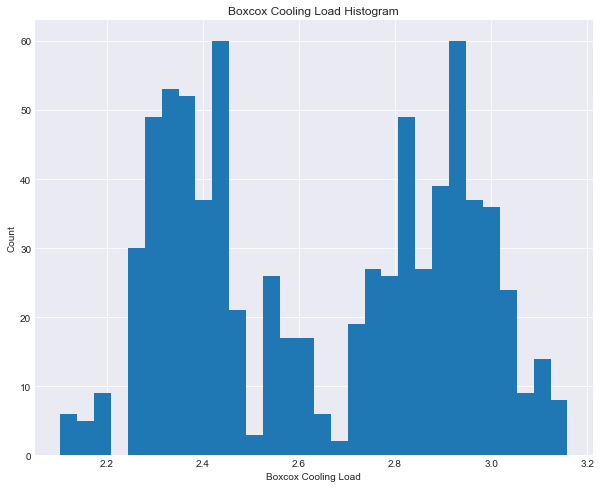

In [24]:
print('Raw Skew for Cooling Load: ',df['cooling_load'].skew())
print('Boxcox Skew: ',y_box['y_boxcox'].skew())
plt.figure(figsize=(10,8))
plt.hist(x=y_box1, bins = 30)
plt.title('Boxcox Cooling Load Histogram')
plt.xlabel('Boxcox Cooling Load')
plt.ylabel('Count')

In [25]:
#### Spliting, Scaling, and PCA on Data
df3 = df2.copy()
df3.drop('cooling_load', inplace = True, axis = 1)
X = df3.drop('y_boxcox', axis =1 ) 
y = df3[['y_boxcox']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
sc1 = MinMaxScaler()
X_train = sc1.fit_transform(X_train)
X_test = sc1.transform(X_test)
X_train.shape, X_test.shape

pca = PCA(.95)
X_train_pca_2 = pca.fit_transform(X_train)
X_test_pca_2 = pca.transform(X_test)

lin2 = LinearRegression()
lin2.fit(X_train_pca_2, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
#### Predictions on Train Set
train_pred_2 = lin2.predict(X_train_pca_2)
R2 = pd.DataFrame([r2_score(y_train, train_pred_2)], columns=['R squared'])
adj_1 = pd.DataFrame([adjusted_r_squared(y_train, train_pred_2)], columns=['Adjusted R squared'])
mse1 =  pd.DataFrame([mean_squared_error(y_train, train_pred_2)], columns=['MSE'])
rmse1 =  pd.DataFrame([np.sqrt(mean_squared_error(y_train, train_pred_2))], columns=['RMSE'])
mae1 = pd.DataFrame([mean_absolute_error(y_train, train_pred_2)], columns=['MAE'])
train_PCA_box = pd.concat([R2, adj_1, mse1, rmse1, mae1], axis = 1)
train_PCA_box

,R squared,Adjusted R squared,MSE,RMSE,MAE
0,0.90447,0.904314,0.007345,0.085704,0.065905


In [27]:
#### Predictions on Test Set
y_pred_2 = lin2.predict(X_test_pca_2)
R2 = pd.DataFrame([r2_score(y_test, y_pred_2)], columns=['R squared'])
adj_1 = pd.DataFrame([adjusted_r_squared(y_test, y_pred_2)], columns=['Adjusted R squared'])
mse1 =  pd.DataFrame([mean_squared_error(y_test, y_pred_2)], columns=['MSE'])
rmse1 =  pd.DataFrame([np.sqrt(mean_squared_error(y_test, y_pred_2))], columns=['RMSE'])
mae1 = pd.DataFrame([mean_absolute_error(y_test, y_pred_2)], columns=['MAE'])
test_PCA_box = pd.concat([R2, adj_1, mse1, rmse1, mae1], axis = 1)
test_PCA_box

,R squared,Adjusted R squared,MSE,RMSE,MAE
0,0.900562,0.899908,0.008116,0.090089,0.070447


### Four Assumptions About Residuals

- **Zero Mean Assumption**: The mean of the residuals for this model is -0.007. This low mean could be from the transformation on the dependent variable

- **Constant Variance Assumption:** In this model the constant variance assumption is violated because of the funnel shape of the Residual Plot. Goal is to have no noticeable patterns. 

- **Normality Assumption:** In this linear model the residuals are not in a normal distribution which violates the normality assumption. The Q-Q plot is evidence of this violation. The blue points are to be right on the red line if the data is normally distributed. Also, the AD test shows a value of 2.30 which is much larger than the critical values 

- **Independence Assumption:**  The value of 2.15 shows no auto-correlation. 


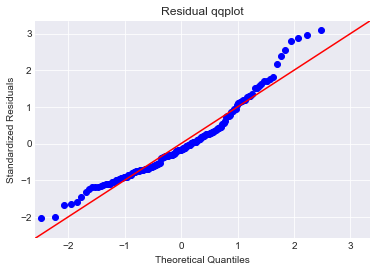

AD Test
statistic:  2.3036542251074366
critical_values:  [0.562 0.64  0.768 0.896 1.065]
significance_level:  [15.  10.   5.   2.5  1. ]
--------------------------------------------------------------------------------
Residual Mean:  -0.007972083774301308
--------------------------------------------------------------------------------
Durbin Watson: [2.15729366]


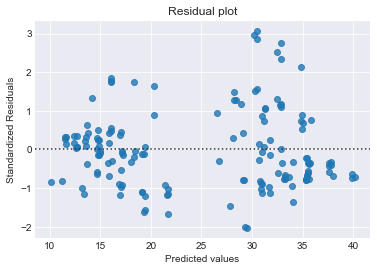

In [28]:
residual_1 = y_test - y_pred_2
res_1 = np.array(residual_1)
scored_res_1 = residual_1.apply(zscore)
sort_res_1 = scored_res_1.sort_values(['y_boxcox'])

## normality assumption
sm.qqplot(sort_res_1,line ='45')
plt.ylabel('Standardized Residuals')
plt.title('Residual qqplot')
pylab.show()
res = np.array(residual_1)
ad = sp.stats.anderson(res_1.ravel(), dist = 'norm')
print('AD Test')
print('statistic: ', ad.statistic)
print('critical_values: ', ad.critical_values)
print('significance_level: ', ad.significance_level)
print('--'*40)
#### Zero-Mean Assumption, Constant Variance Assumption
sns.residplot(y_pred, scored_res_1)
plt.title('Residual plot')
plt.xlabel('Predicted values')
plt.ylabel('Standardized Residuals')
print('Residual Mean: ', res_1.mean())
print('--'*40)
#### Independence Assumption
print('Durbin Watson:', durbin_watson(residual_1, axis = 0))

#### Ridge Regression

In this model Ridge regression was used. A for loop was created to loop through different alpha’s in the model. The model with the highest R squared was selected, which was an alpha of 1. The R squared and adjusted R squared for the test data has a range of .80 to .90 , which shows that the model explains a lot of the variation in cooling load.  The mean absolute error from the test data of 2.322, which isn’t the best but is better than the model with only PCA. Also, the R squared from the test and train are close. This shows that the model is not over fit to the training data. 

In [29]:
### Split and Scaling of data
from sklearn.linear_model import Ridge

X = df1.drop('cooling_load', axis =1 ) 
y = df1[['cooling_load']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
sc1 = MinMaxScaler()
X_train_scaled = sc1.fit_transform(X_train)
X_test_scaled = sc1.transform(X_test)

In [30]:
### For loop for best alpha
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    model_rid = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = model_rid.score(X_train_scaled, y_train)
    num_coeff_bigger = np.sum(abs(model_rid.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}'
         .format(this_alpha, num_coeff_bigger, r2_train))

Alpha = 0.00
num abs(coeff) > 1.0: 6, r-squared training: 0.89
Alpha = 1.00
num abs(coeff) > 1.0: 6, r-squared training: 0.89
Alpha = 10.00
num abs(coeff) > 1.0: 5, r-squared training: 0.87
Alpha = 20.00
num abs(coeff) > 1.0: 5, r-squared training: 0.86
Alpha = 50.00
num abs(coeff) > 1.0: 5, r-squared training: 0.83
Alpha = 100.00
num abs(coeff) > 1.0: 6, r-squared training: 0.78
Alpha = 1000.00
num abs(coeff) > 1.0: 2, r-squared training: 0.34


In [31]:
#### intercept and coefficient
model_rid = Ridge(alpha = 1)
model_rid.fit(X_train_scaled, y_train)
rigt0, rigt1 = model_rid.intercept_, model_rid.coef_
rigt0, rigt1

(array([17.72626808]),
 array([[-8.42983196, -1.26806043,  3.08997557, -4.09406157, 16.617924  ,
          0.43367769,  5.95159925,  0.12172997]]))

In [32]:
#### Predictions on Train Set
pred_ridge_train = model_rid.predict(X_train_scaled)
R2 = pd.DataFrame([r2_score(y_train, pred_ridge_train)], columns=['R squared'])
adj_1 = pd.DataFrame([adjusted_r_squared(y_train, pred_ridge_train)], columns=['Adjusted R squared'])
mse1 =  pd.DataFrame([mean_squared_error(y_train, pred_ridge_train)], columns=['MSE'])
rmse1 =  pd.DataFrame([np.sqrt(mean_squared_error(y_train, pred_ridge_train))], columns=['RMSE'])
mae1 = pd.DataFrame([mean_absolute_error(y_train, pred_ridge_train)], columns=['MAE'])
train_ridge = pd.concat([R2, adj_1, mse1, rmse1, mae1], axis = 1)
train_ridge


,R squared,Adjusted R squared,MSE,RMSE,MAE
0,0.885749,0.885562,10.21864,3.196661,2.283485


In [33]:
#### Predictions on Test Set
pred_ridge = model_rid.predict(X_test_scaled)

R2 = pd.DataFrame([r2_score(y_test,pred_ridge)], columns=['R squared'])
adj_1 = pd.DataFrame([adjusted_r_squared(y_test, pred_ridge)], columns=['Adjusted R squared'])
mse1 =  pd.DataFrame([mean_squared_error(y_test, pred_ridge)], columns=['MSE'])
rmse1 =  pd.DataFrame([np.sqrt(mean_squared_error(y_test, pred_ridge))], columns=['RMSE'])
mae1 = pd.DataFrame([mean_absolute_error(y_test, pred_ridge)], columns=['MAE'])
test_ridge = pd.concat([R2, adj_1, mse1, rmse1, mae1], axis = 1)
test_ridge

,R squared,Adjusted R squared,MSE,RMSE,MAE
0,0.880223,0.879435,11.26569,3.35644,2.322524


### Four Assumptions About Residuals

- **Zero Mean Assumption:** The mean of the residuals for this model is -0.13. The mean for ridge regression is lower than the mean from PCA only. 

- **Constant Variance Assumption:** In this model the constant variance assumption is violated because of the funnel shape of the Residual Plot. Goal is to have no noticeable patterns. 

- **Normality Assumption:** In this linear model the residuals are not in a normal distribution which violates the normality assumption. The Q-Q plot is evidence of this violation. The blue points are around the line at the bottom but not at the top. The points at the top nowhere near the line could be outliers. Also, the AD test has a statistic of 3.19 which is not close to the critical values. 

- **Independence Assumption:** The Durbin Watson test gives a value of 2.007, which states that the residuals are independent. 


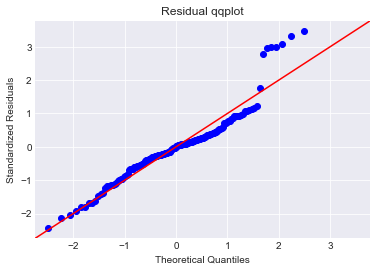

AD Test
statistic:  3.1934909375378595
critical_values:  [0.562 0.64  0.768 0.896 1.065]
significance_level:  [15.  10.   5.   2.5  1. ]
--------------------------------------------------------------------------------
Residual Mean:  -0.13169671614791012
--------------------------------------------------------------------------------
Durbin Watson: [2.00650549]


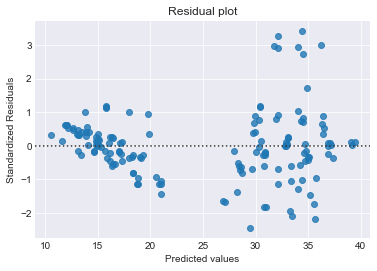

In [34]:
residual_4 = y_test - pred_ridge
res_4 = np.array(residual_4)
scored_res_4 = residual_4.apply(zscore)
sort_res_4 = scored_res_4.sort_values(['cooling_load'])
    
## normality assumption
sm.qqplot(sort_res_4, line='45')
plt.title('Residual qqplot')
plt.ylabel('Standardized Residuals')
pylab.show()
res = np.array(residual_4)
ad = sp.stats.anderson(res_4.ravel(), dist = 'norm')
print('AD Test')
print('statistic: ', ad.statistic)
print('critical_values: ', ad.critical_values)
print('significance_level: ', ad.significance_level)
print('--'*40)
#### Zero-Mean Assumption, Constant Variance Assumption
sns.residplot(pred_ridge, scored_res_4)
plt.title('Residual plot')
plt.xlabel('Predicted values')
plt.ylabel('Standardized Residuals')
print('Residual Mean: ', res_4.mean())
print('--'*40)
#### Independence Assumption
print('Durbin Watson:', durbin_watson(residual_4, axis = 0))

### Lassos Regression

Lasso regression was used for the last model. A for loop was created to loop through different alpha’s in the model. The model with the highest R squared was selected, which was an alpha of 0.5. In Lasso the coefficients of variables that are not useful to the model are zero. For this dataset X1, X2, X4, and X6 are zero. The mean absolute error from the test data of 2.45, is better than the model with only PCA, but not as good as the ridge regression model. The R squared from the test and train are close. This shows that the model is not over fit to the training data. 

In [35]:
#### Split and Scale data
from sklearn.linear_model import Lasso

X = df1.drop('cooling_load', axis =1 ) 
y = df1[['cooling_load']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
sc1 = StandardScaler()
X_train_scaled = sc1.fit_transform(X_train)
X_test_scaled = sc1.transform(X_test)

In [36]:
#### For Loop fpr best alpha
for alpha in [0.5, 1, 2, 3, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train))

Alpha = 0.50
Features kept: 3, r-squared training: 0.87

Alpha = 1.00
Features kept: 3, r-squared training: 0.85

Alpha = 2.00
Features kept: 3, r-squared training: 0.77

Alpha = 3.00
Features kept: 1, r-squared training: 0.70

Alpha = 5.00
Features kept: 1, r-squared training: 0.52

Alpha = 10.00
Features kept: 0, r-squared training: 0.00

Alpha = 20.00
Features kept: 0, r-squared training: 0.00

Alpha = 50.00
Features kept: 0, r-squared training: 0.00



In [37]:
#### intercept and coefficient
model_las = Lasso(alpha = 0.5)
model_las.fit(X_train_scaled, y_train)
last0, last1 = model_las.intercept_, model_las.coef_
last0, last1

(array([24.51814332]),
 array([ 0.        , -0.        ,  1.38929513, -0.        ,  7.59496782,
         0.        ,  1.52148195,  0.        ]))

In [38]:
#### coefficient and column headers
coef = pd.DataFrame(model_las.coef_, columns=['Coef'])
col = pd.DataFrame(X_train.columns, columns=['Columns'])
pd.concat([col, coef], axis = 1)

,Columns,Coef
0,X1,0.000000
1,X2,-0.000000
2,X3,1.389295
3,X4,-0.000000
4,X5,7.594968
5,X6,0.000000
6,X7,1.521482
7,X8,0.000000


In [39]:
#### Predictions on Train Set
las_pred_train = model_las.predict(X_train_scaled)
las_pred_train = las_pred_train.reshape(-1,1)

R2 = pd.DataFrame([r2_score(y_train, las_pred_train)], columns=['R squared'])
adj_1 = pd.DataFrame([adjusted_r_squared(y_train, las_pred_train)], columns=['Adjusted R squared'])
mse1 =  pd.DataFrame([mean_squared_error(y_train, las_pred_train)], columns=['MSE'])
rmse1 =  pd.DataFrame([np.sqrt(mean_squared_error(y_train, las_pred_train))], columns=['RMSE'])
mae1 = pd.DataFrame([mean_absolute_error(y_train, las_pred_train)], columns=['MAE'])
train_lasso = pd.concat([R2, adj_1, mse1, rmse1, mae1], axis = 1)
train_lasso

,R squared,Adjusted R squared,MSE,RMSE,MAE
0,0.873497,0.87329,11.314499,3.363703,2.399097


In [40]:
#### Predictions on Test Set
las_pred_test = model_las.predict(X_test_scaled)
las_pred_test = las_pred_test.reshape(-1,1)

R2 = pd.DataFrame([r2_score(y_test,las_pred_test)], columns=['R squared'])
adj_1 = pd.DataFrame([adjusted_r_squared(y_test, las_pred_test)], columns=['Adjusted R squared'])
mse1 =  pd.DataFrame([mean_squared_error(y_test, las_pred_test)], columns=['MSE'])
rmse1 =  pd.DataFrame([np.sqrt(mean_squared_error(y_test, las_pred_test))], columns=['RMSE'])
mae1 = pd.DataFrame([mean_absolute_error(y_test, las_pred_test)], columns=['MAE'])
test_lasso = pd.concat([R2, adj_1, mse1, rmse1, mae1], axis = 1)
test_lasso

,R squared,Adjusted R squared,MSE,RMSE,MAE
0,0.865972,0.86509,12.606082,3.550505,2.459497


### Four Assumptions About Residuals

- **Zero Mean Assumption:** The mean of the residuals for this model is -0.13. The mean for lasso regression is very close to the mean of the ridge regression. 

- **Constant Variance Assumption:** In this model the constant variance assumption is violated because of the funnel shape of the residual plot. Goal is to have no noticeable patterns. Also, there is a huge split between the lower predicted values and high predicted values in the residual plot. 

- **Normality Assumption:** In this linear model the residuals are not in a normal distribution which violates the normality assumption. The Q-Q plot is evidence of this violation. The blue points are around the line in the middle but not close to the line at the bottom and top. Also, the AD test has a statistic of 3.655 which is not close to the critical values. 

- **Independence Assumption:** The Durbin Watson test gives a value of 2.13, which states that the residuals are independent. 


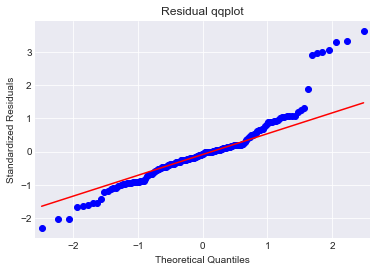

AD Test
statistic:  3.655167310369393
critical_values:  [0.562 0.64  0.768 0.896 1.065]
significance_level:  [15.  10.   5.   2.5  1. ]
--------------------------------------------------------------------------------
Residual Mean:  -0.1348362929048708
--------------------------------------------------------------------------------
Durbin Watson: [2.13771759]


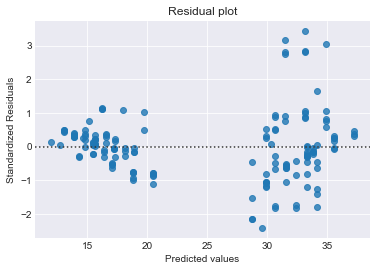

In [41]:
residual_5 = y_test - las_pred_test
res_5 = np.array(residual_5)
scored_res_5 = residual_5.apply(zscore)
sort_res_5 = scored_res_5.sort_values(['cooling_load'])
    
## normality assumption
sm.qqplot(sort_res_5, line='q')
plt.title('Residual qqplot')
plt.ylabel('Standardized Residuals')
pylab.show()
res = np.array(residual_5)
ad = sp.stats.anderson(res_5.ravel(), dist = 'norm')
print('AD Test')
print('statistic: ', ad.statistic)
print('critical_values: ', ad.critical_values)
print('significance_level: ', ad.significance_level)
print('--'*40)
#### Zero-Mean Assumption, Constant Variance Assumption
sns.residplot(las_pred_test, scored_res_5)
plt.title('Residual plot')
plt.xlabel('Predicted values')
plt.ylabel('Standardized Residuals')
print('Residual Mean: ', res_5.mean())
print('--'*40)
#### Independence Assumption
print('Durbin Watson:', durbin_watson(residual_5, axis = 0))

### Comparison of Models

A comparison of all the model’s metrics from the test dataset was created.  After viewing the metrics, the ridge regression model is the best. It has the highest R squared and lowest MAE of a model that didn’t have a transformation on the dependent variable. If there was more data a comparison of both the boxcox model and the ridge regression model would be the next step. 

In [42]:
test_PCA['Model'] = 'PCA Only Model'
test_PCA_box['Model'] = 'PCA Model With Boxcox'
test_lasso['Model'] = 'Lasso'
test_ridge['Model'] = 'Ridge'

df_all = pd.concat([test_PCA, test_PCA_box, test_lasso, test_ridge])
df_all = df_all.iloc[:,[5,0,1,2,3,4]]
df_all

,Model,R squared,Adjusted R squared,MSE,RMSE,MAE
0,PCA Only Model,0.850310,0.849325,14.079197,3.752226,2.729340
0,PCA Model With Boxcox,0.900562,0.899908,0.008116,0.090089,0.070447
0,Lasso,0.865972,0.865090,12.606082,3.550505,2.459497
0,Ridge,0.880223,0.879435,11.265690,3.356440,2.322524


## Conclusion

When going through the EDA process with this dataset the biggest take away was that many of the variables in the dataset are highly correlated with other variables that are not the dependent variable. Once this information came to light, the first step was to create a model that didn’t have multicollinearity. PCA was the first choice to handle the correlation problem. PCA was added to the two linear regression models. When the boxcox transformation was conducted on the dependent variable the best R squared and MAE was found. Based on the linear assumption information the model with the boxcox transformation was no different than the other models. The model still had a funnel shape in the residuals plot and the residuals were still not normally distributed.  The low MAE most likely came from the lower magnitude of cooling load from the transformation.  When viewing ridge and lasso regression the two models of comparable metrics with ridge being slightly better. With the highest R squared and the lowest MAE out of all the models that didn’t have boxcox done on the dependent variable ridge regression seems to be the best. If there was more data to test a more in-depth comparison between the boxcox model and the ridge model would have been the next step. 